## Algerian Forest Fire Prediction EDA - Utkarsh Gaikwad

 Dataset Source - https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"
df = pd.read_csv(url,header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [2]:
df.shape

(246, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Checking Missing Values

In [4]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

### Missing Values found Drop the missing values

In [5]:
df = df.dropna(axis=0).reset_index(drop=True)

In [6]:
df.loc[:122,'Region']="Bej"
df.loc[122:,'Region']="SB Abs"

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bej
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bej
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bej
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bej
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bej


In [8]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,SB Abs


In [9]:
df = df.drop(122).reset_index(drop=True)

In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    object
dtypes: object(15)
memory usage: 28.6+ KB


In [13]:
int_cols = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

In [14]:
df[int_cols] = df[int_cols].astype(int)

In [15]:
float_cols = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [16]:
df[float_cols] = df[float_cols].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.6+ KB


In [18]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [19]:
df['Classes'] = df['Classes'].str.strip()

In [20]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [21]:
df.to_csv('Cleaned_Algerian_Forest_Fire.csv',index=False)

## Exploratory Data Analysis

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [23]:
cat_cols = list(df.select_dtypes(include='object').columns)
num_cols = list(df.select_dtypes(exclude='object').columns)
print(f'Categorical Columns : {cat_cols}')
print(f'Numerical Columns : {num_cols}')

Categorical Columns : ['Classes', 'Region']
Numerical Columns : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [24]:
df[cat_cols].describe().T

,count,unique,top,freq
Classes,243,2,fire,137
Region,243,2,Bej,122


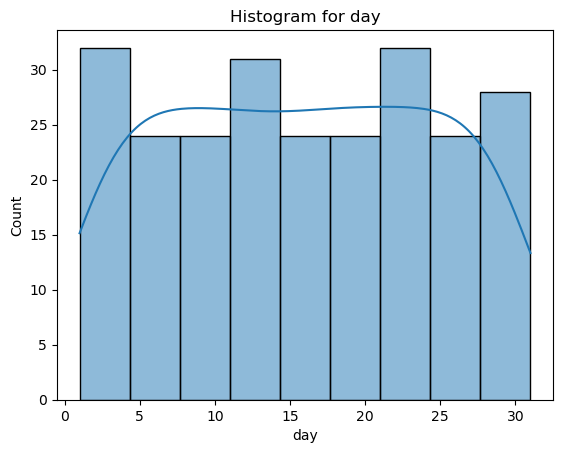

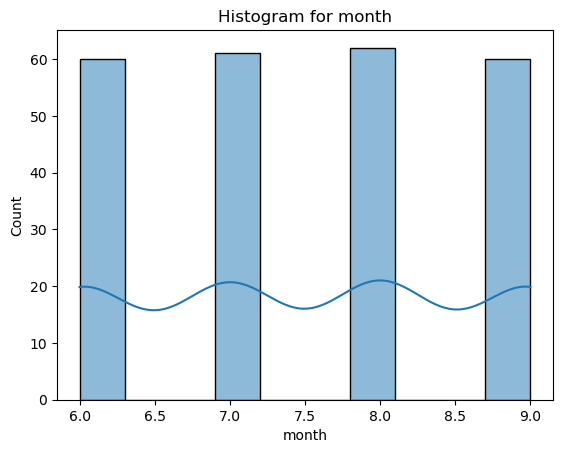

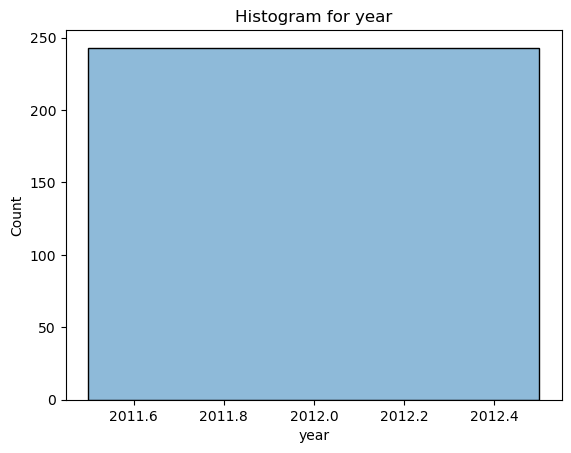

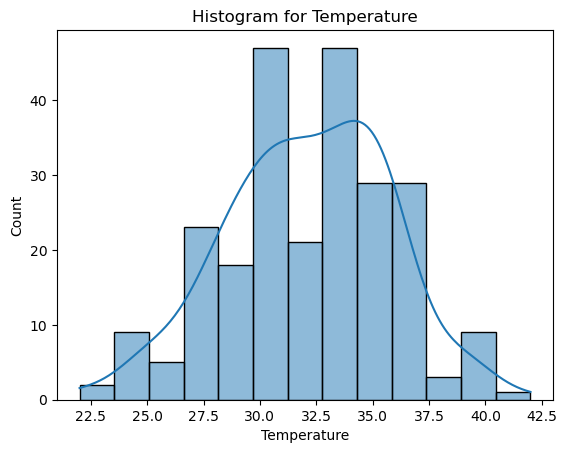

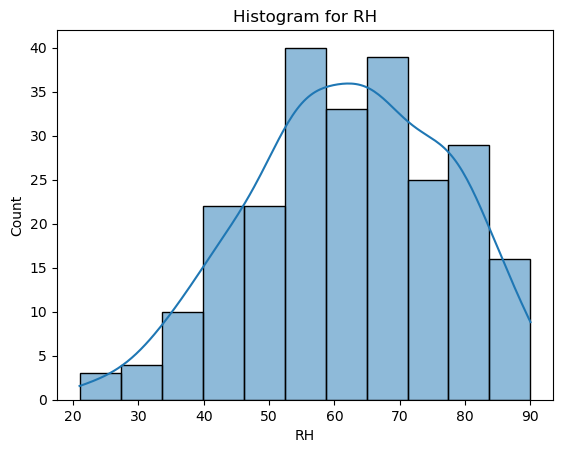

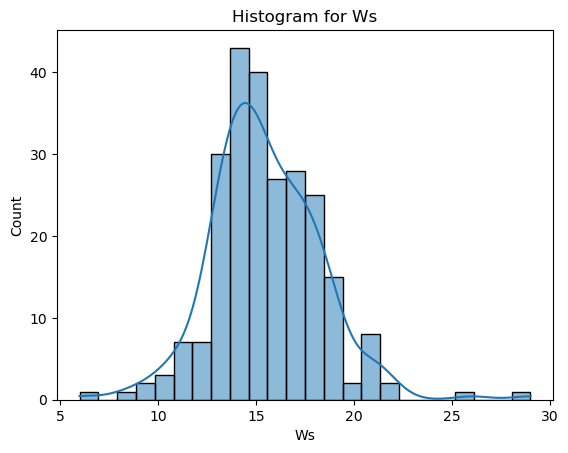

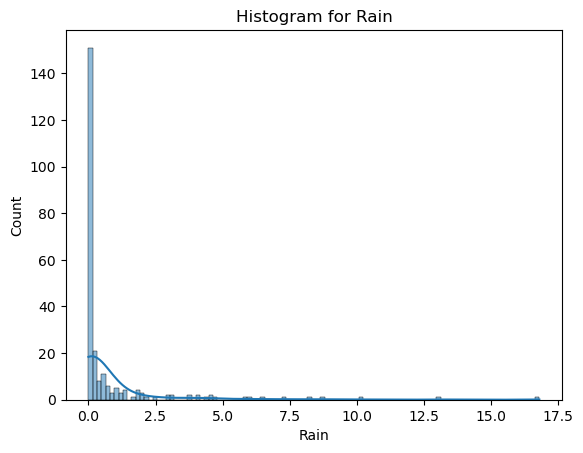

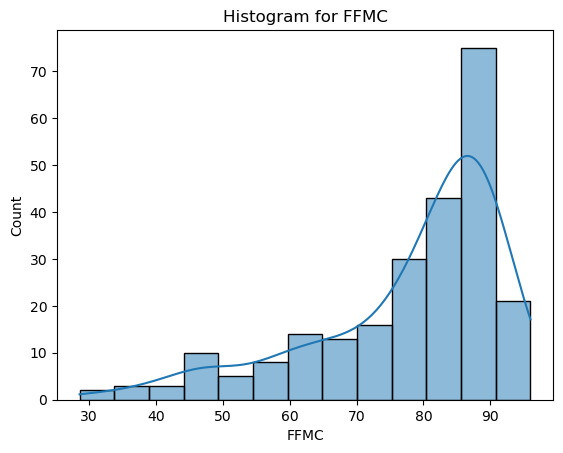

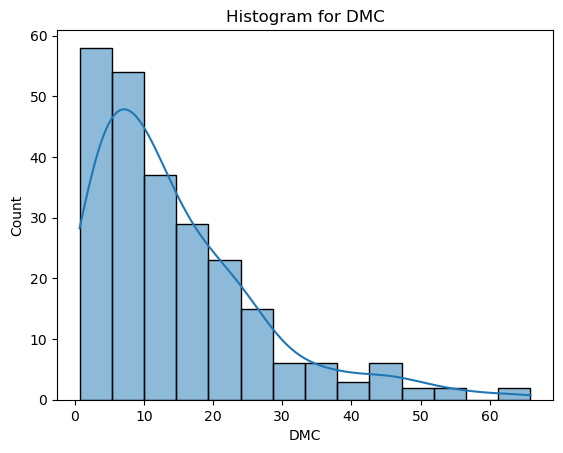

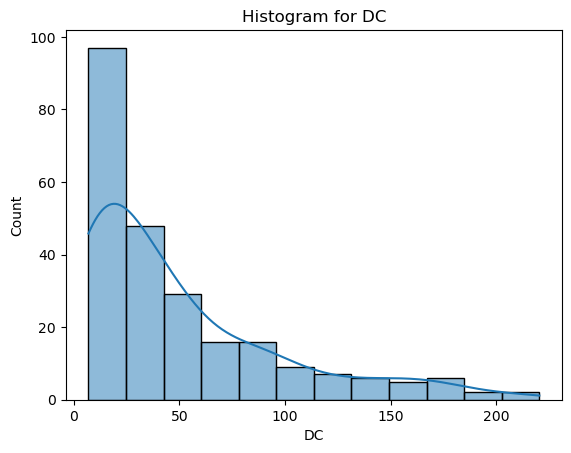

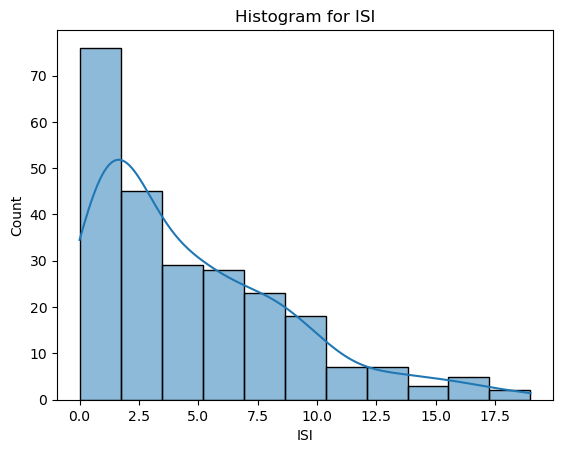

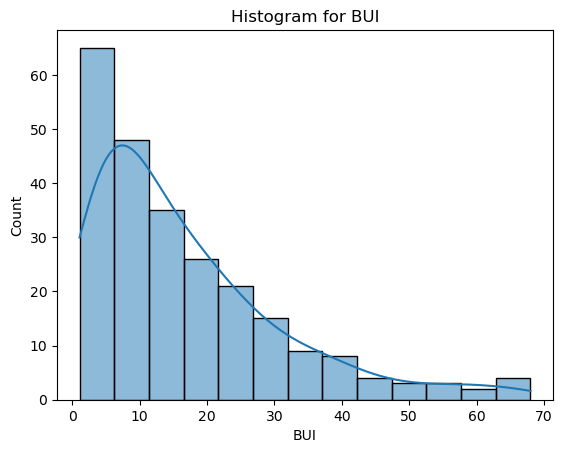

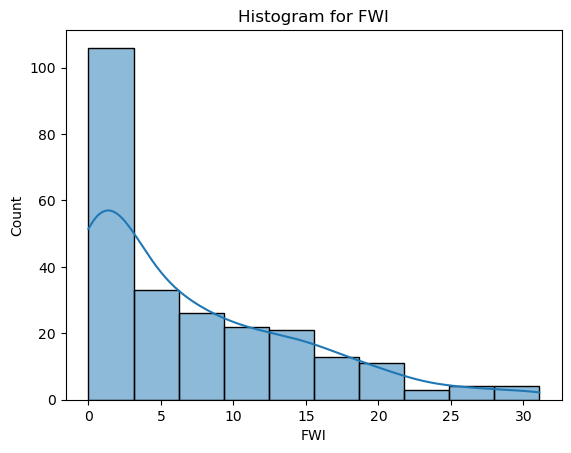

In [25]:
# Univariate Numeric Columns
import seaborn as sns
import matplotlib.pyplot as plt
for i in num_cols:    
    sns.histplot(data=df,x=i,kde=True)
    plt.title(f'Histogram for {i}')
    print('\n\n')
    plt.show()

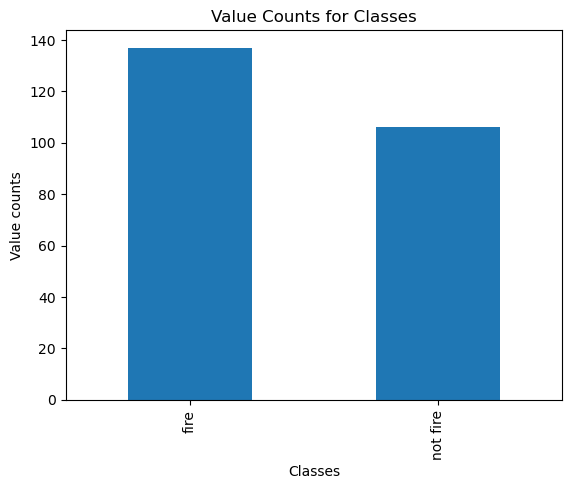

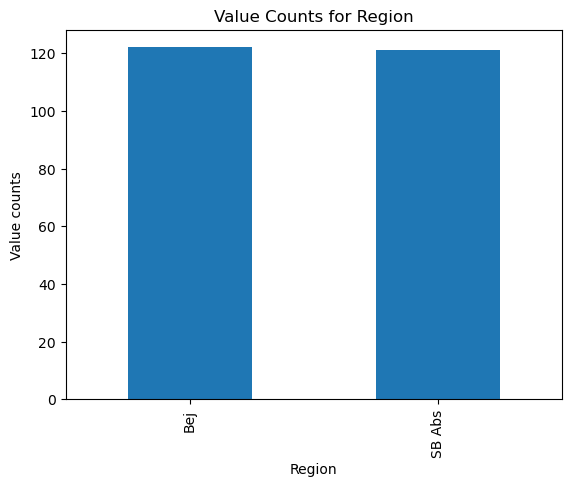

In [26]:
# Value Counts for Categorical Variables
for i in cat_cols:
    df[i].value_counts().plot(kind='bar',
                              title=f'Value Counts for {i}',
                              xlabel=i,
                              ylabel='Value counts')
    print('\n\n')
    plt.show()

In [27]:
## Bivariate Analysis
num_cols.remove('year')

In [28]:
df['year'].unique()

array([2012])

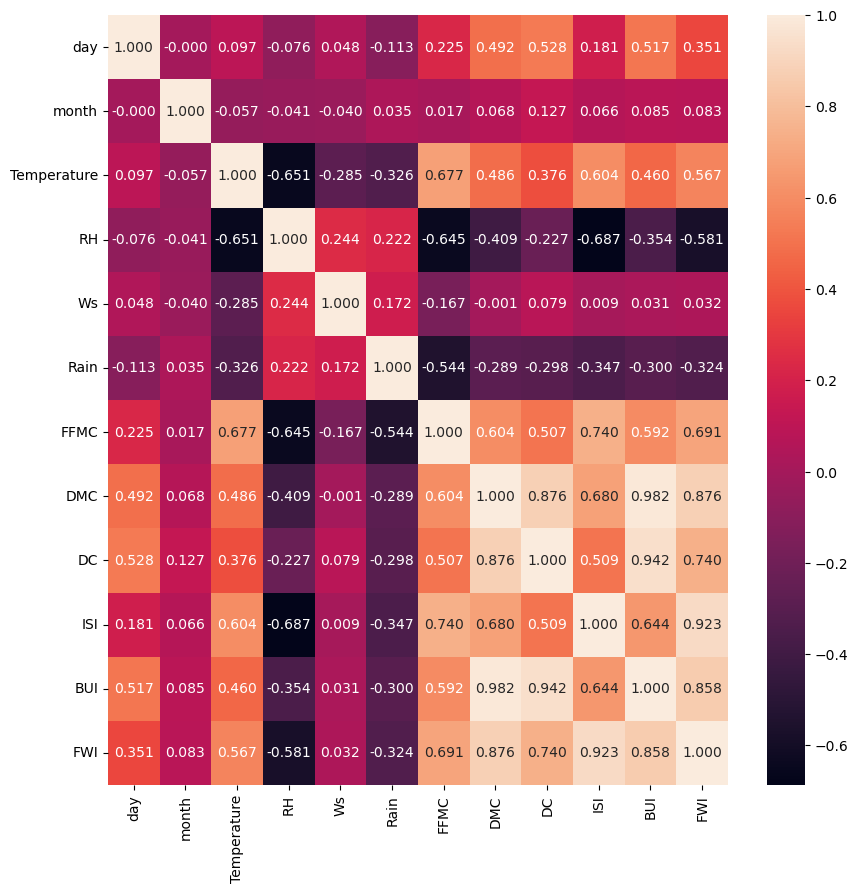

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_cols].corr(),annot=True,fmt='.3f')
plt.show()

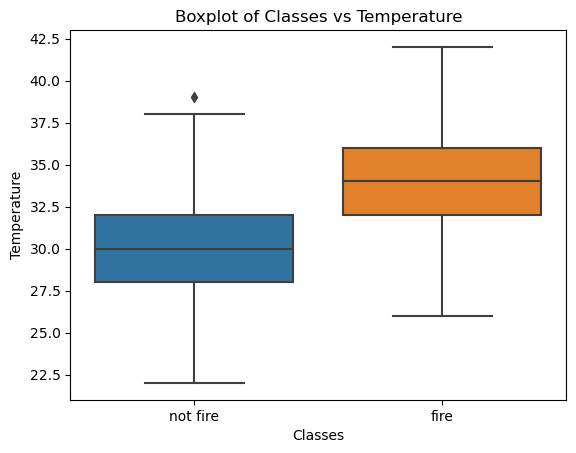

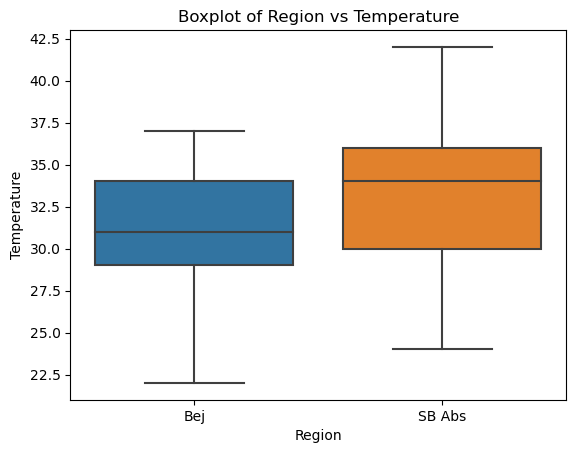

In [30]:
# Box Plot wrt Target i.e. Temperature
for i in cat_cols:
    sns.boxplot(data=df,x=i,y='Temperature')
    plt.title(f'Boxplot of {i} vs Temperature')
    plt.show()
    print('\n\n')

In [31]:
df.groupby(by=['Region','month','Classes',]).count()[['Temperature']]

Temperature
Region month Classes              
Bej    6     fire               13
             not fire           17
       7     fire               15
             not fire           16
       8     fire               24
             not fire            7
       9     fire                7
             not fire           23
SB Abs 6     fire               12
             not fire           18
       7     fire               23
             not fire            7
       8     fire               27
             not fire            4
       9     fire               16
             not fire           14

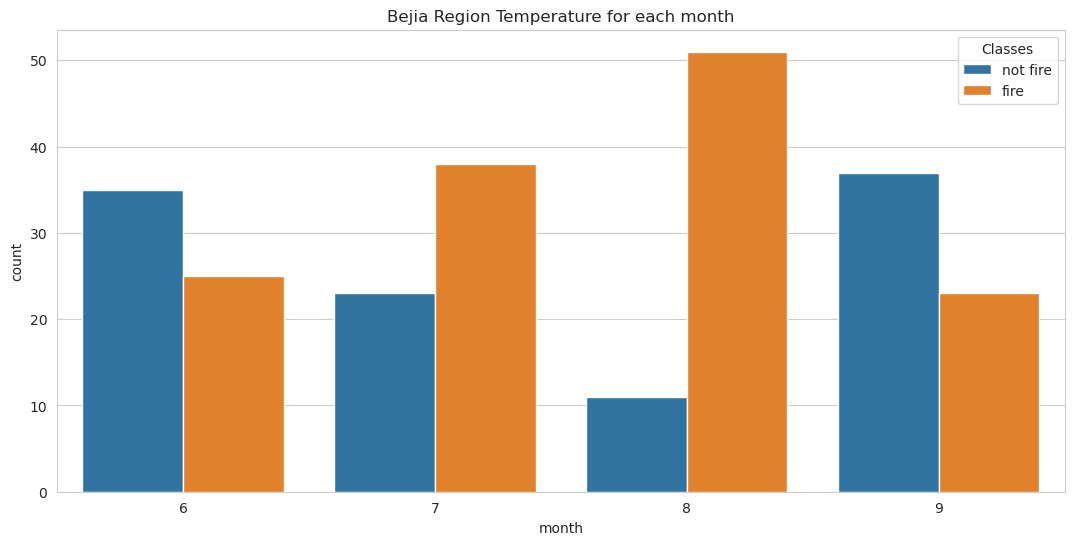

In [32]:
df_temp = df[df.Region=='Bej']
plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(data=df, x='month',hue="Classes")
plt.title('Bejia Region Temperature for each month')
plt.show()

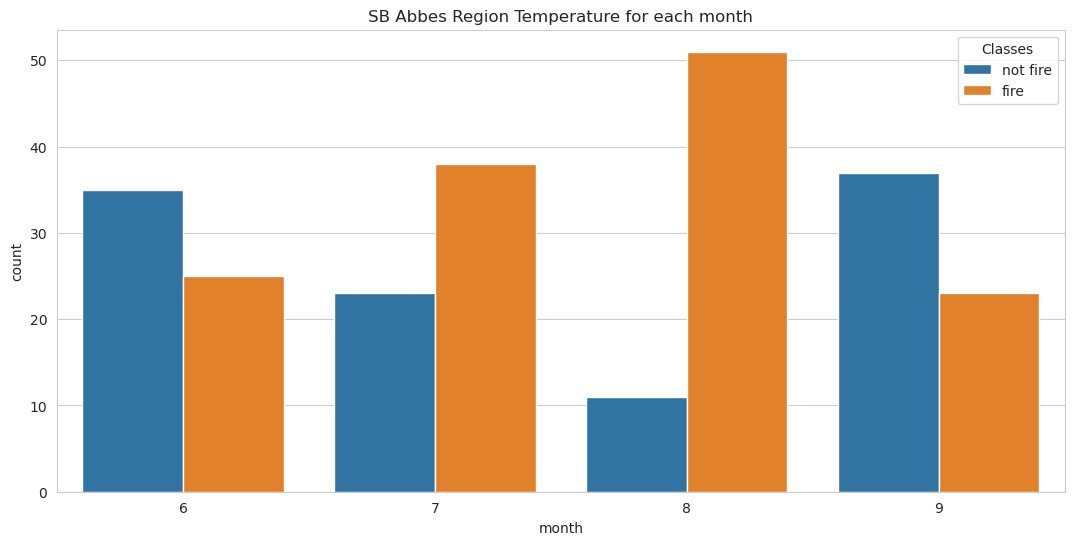

In [33]:
df_temp = df[df.Region=='SB Abs']
plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(data=df, x='month',hue="Classes")
plt.title('SB Abbes Region Temperature for each month')
plt.show()

# Data Processing

In [34]:
# Ordinal Encoding for classes
class_mapper = {'fire':1,'not fire':0}
df['Classes'] = df['Classes'].map(class_mapper)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bej
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,Bej
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bej
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,Bej
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,Bej


In [35]:
# One Hot Encoding for Region
df_reg = pd.get_dummies(df['Region'])
df_reg.head()

,Bej,SB Abs
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [36]:
df_new = pd.concat([df,df_reg],axis=1)
df_new = df_new.drop(labels=['Region'],axis=1)
df_new.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Bej,SB Abs
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1,0
